# Data analysis

It is crucial for neural networks to have the most optimal and useful data as inputs. In the case of batteries, there are multiple parameters which are present and a reduction of data dimensionality is essential. This can be done by techniques such as PCA, which is a statistical technique that transforms the data into a new coordinate system, where the greatest variances by some projection of the data come to lie on the first coordinate (called the first principal component), the second greatest variance on the second coordinate, and so on. PCA can significantly reduce the dimensionality of the data by selecting a subset of these new coordinates (principal components).

### 1) Importing important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import *

C:\Users\ADITYA\AppData\Local\Temp\ipykernel_8024\148976942.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### 2) Obtaining the scaled data

In [2]:
data = pd.read_excel('C:/Users/ADITYA/OneDrive - Imperial College London/Year 4/FYP/Final-year-project/VScode/Dataset_scaled.xlsx')
X = data.iloc[:,:11]
X = X.drop('I', axis = 1)
X = X.iloc[1:,:]
print(X)

          S8_cur    S4_cur    S2_cur    S1_cur     V_cur    Sp_cur        EH  \
1       2.914558 -2.960002 -0.929154 -0.232859  3.965567 -0.925127  3.914506   
2       2.914450 -2.959872 -0.929154 -0.232859  3.953472 -0.925127  3.902619   
3       2.914342 -2.959743 -0.929154 -0.232858  3.941694 -0.925127  3.891043   
4       2.914234 -2.959613 -0.929154 -0.232858  3.930215 -0.925127  3.879762   
5       2.914126 -2.959483 -0.929154 -0.232858  3.919021 -0.925127  3.868761   
...          ...       ...       ...       ...       ...       ...       ...   
144008 -0.715584 -0.685340  2.665422 -0.146794 -0.871388  2.664142 -0.874464   
144009 -0.715584 -0.685383  2.665497 -0.146795 -0.871392  2.664216 -0.874468   
144010 -0.715584 -0.685426  2.665571 -0.146795 -0.871397  2.664290 -0.874473   
144011 -0.715584 -0.685469  2.665645 -0.146796 -0.871401  2.664365 -0.874477   
144012 -0.715584 -0.685512  2.665719 -0.146797 -0.871405  2.664439 -0.874481   

              EL        iH        iL  


### 3) Principle component analysis (PCA)

In [3]:
# Step 1: Apply PCA
pca = PCA(n_components=9)  # n_components equals the number of columns in your data
principal_components = pca.fit_transform(X)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3','PC4','PC5','PC6','PC7','PC8','PC9'])

# # Start with n_components less than the total number of columns to see the variance explained
# pca = PCA(n_components=0.999)  # Retain 99.9% of the variance
# principal_components = pca.fit_transform(X)

# # Convert the principal components into a DataFrame
# pca_df = pd.DataFrame(data=principal_components)

# print(pca_df)

# Analyze the Explained Variance Ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio: ", explained_variance)

# Cumulative explained variance helps to determine the number of components
cumulative_explained_variance = np.cumsum(explained_variance)
print("Cumulative Explained Variance: ", cumulative_explained_variance)

# Decide on the number of components to keep
# For example, to retain components that contribute to 95% of variance
components_to_keep = np.argmax(cumulative_explained_variance >= 0.999) + 1
print(f"Number of components to keep for 99.9% variance: {components_to_keep}")

# Get the component loadings
loadings = pca.components_

# Create a DataFrame with the loadings and the original column names as the index
loadings_df = pd.DataFrame(data=loadings, columns=X.columns, index=[f'PC{i+1}' for i in range(loadings.shape[0])])

print("PCA Component Loadings:\n", loadings_df)

Explained Variance Ratio:  [7.11761833e-01 1.66300310e-01 8.55943113e-02 3.43101284e-02
 2.03273602e-03 6.81653997e-07 8.10355039e-12 4.41050322e-14
 4.49226222e-30]
Cumulative Explained Variance:  [0.71176183 0.87806214 0.96365645 0.99796658 0.99999932 1.
 1.         1.         1.        ]
Number of components to keep for 99.9% variance: 5
PCA Component Loadings:
            S8_cur        S4_cur        S2_cur        S1_cur         V_cur  \
PC1  3.412967e-01 -2.489383e-01 -2.774030e-01 -9.060979e-02  3.703117e-01   
PC2 -1.623503e-01  4.781983e-01 -4.890372e-01  4.556340e-01 -1.087891e-01   
PC3  3.189430e-01 -4.385796e-01  9.623471e-02  8.128275e-01 -9.752502e-03   
PC4 -3.333663e-01  1.867872e-01  3.682480e-01  2.963493e-01  3.833527e-02   
PC5 -3.033823e-01  3.143032e-01  8.603237e-02  1.886565e-01  4.223562e-01   
PC6 -1.352394e-03  1.261202e-03  6.249367e-04  4.823294e-04  1.434530e-02   
PC7  5.173945e-06 -6.158194e-06 -8.928016e-08 -1.824166e-06 -5.993133e-01   
PC8 -4.976874e-0

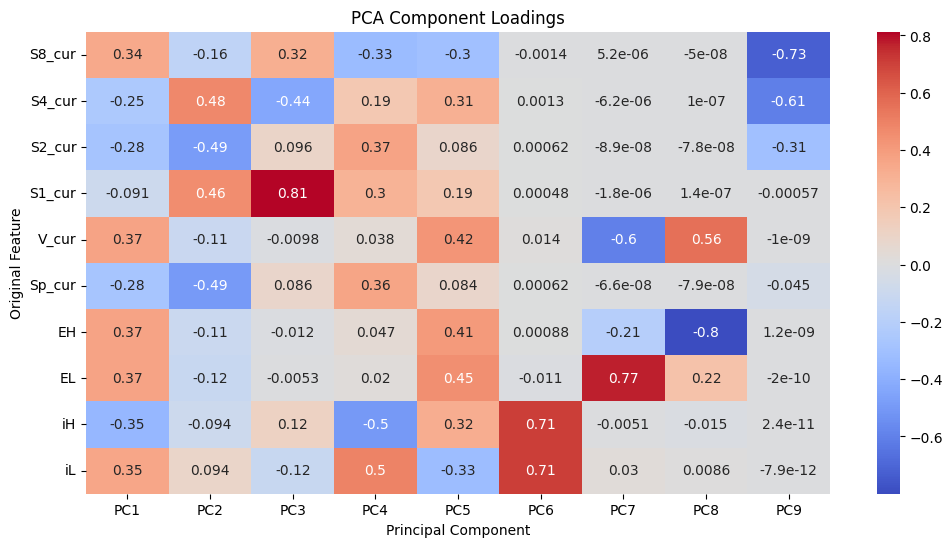

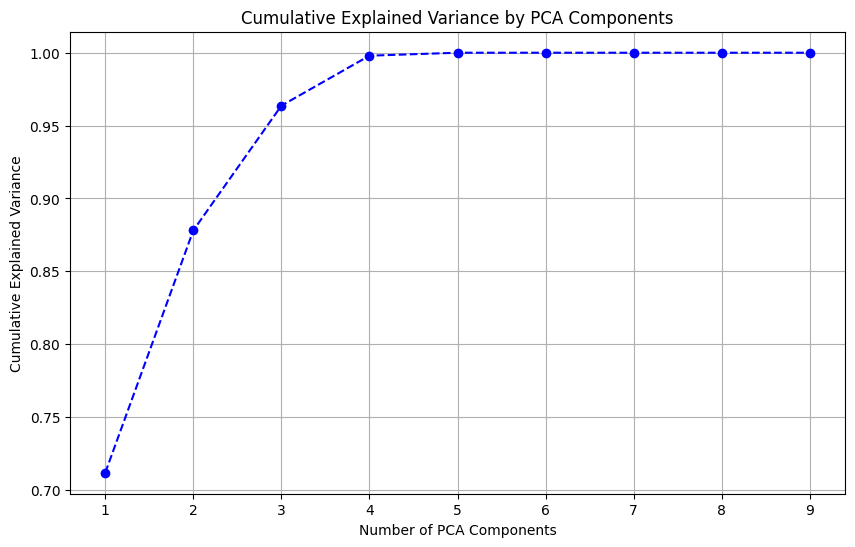

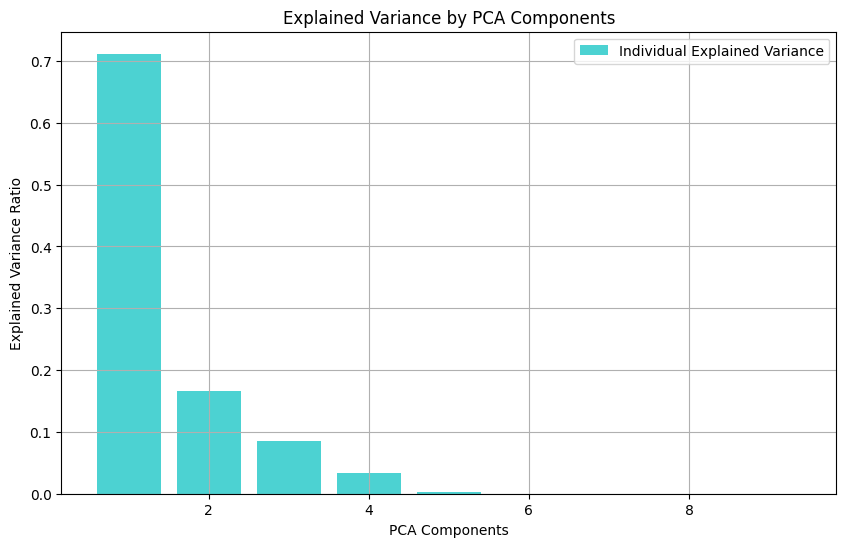

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the loadings for the first two principal components
plt.figure(figsize=(12, 6))
sns.heatmap(loadings_df.iloc[:10, :].T, cmap='coolwarm', annot=True)
plt.title('PCA Component Loadings')
plt.xlabel('Principal Component')
plt.ylabel('Original Feature')
plt.show()



plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--', color='b')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color='c', label='Individual Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.xlabel('PCA Components')
plt.ylabel('Explained Variance Ratio')
plt.legend(loc='best')
plt.grid(True)
plt.show()

### 3) Using NN to forecast PCA values

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

lookback = 1000  # Using the last 3 time steps to predict the next one

# Initialize X_train and y_train lists
X_train = []
y_train = []

# Loop through the pca_df DataFrame to create lagged sequences
for i in range(lookback, len(pca_df) - 1):  # -1 since we're predicting one step ahead
    X_train.append(pca_df.iloc[i-lookback:i].values.flatten())  # Flatten to make each row in X_train a flat array
    y_train.append(pca_df.iloc[i, 0])  # Assuming we're predicting the first PCA component at the next time step


from sklearn.model_selection import train_test_split
# Convert lists to arrays for modeling
X_train, y_train = np.array(X_train), np.array(y_train)


# Split the data while maintaining the time series order
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
    X_train, y_train, test_size=0.2, shuffle=False)


# Reshape X_train and X_test for LSTM [samples, time steps, features]
X_train_reshaped = X_train_split.reshape((X_train_split.shape[0], lookback, pca_df.shape[1]))
X_test_reshaped = X_test_split.reshape((X_test_split.shape[0], lookback, pca_df.shape[1]))

# Adjust the input shape in the LSTM layer to match X_train_reshaped
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(lookback, pca_df.shape[1])))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
# Start with the last 'lookback' values from pca_df
last_values = pca_df.iloc[-lookback:].values.reshape(1, lookback, pca_df.shape[1])

# Initialize a list to store the forecasts
forecasts = []

# Generate 100 forecasts
for _ in range(100):
    # Forecast the next value
    next_value = model.predict(last_values)
    forecasts.append(next_value.flatten()[0])

    # Update last_values with the forecasted value
    last_values = np.append(last_values[:, 1:, :], [[next_value]], axis=1)

# Convert forecasts to a numpy array
forecasts = np.array(forecasts)

894/894 [==============================] - 103s 113ms/step


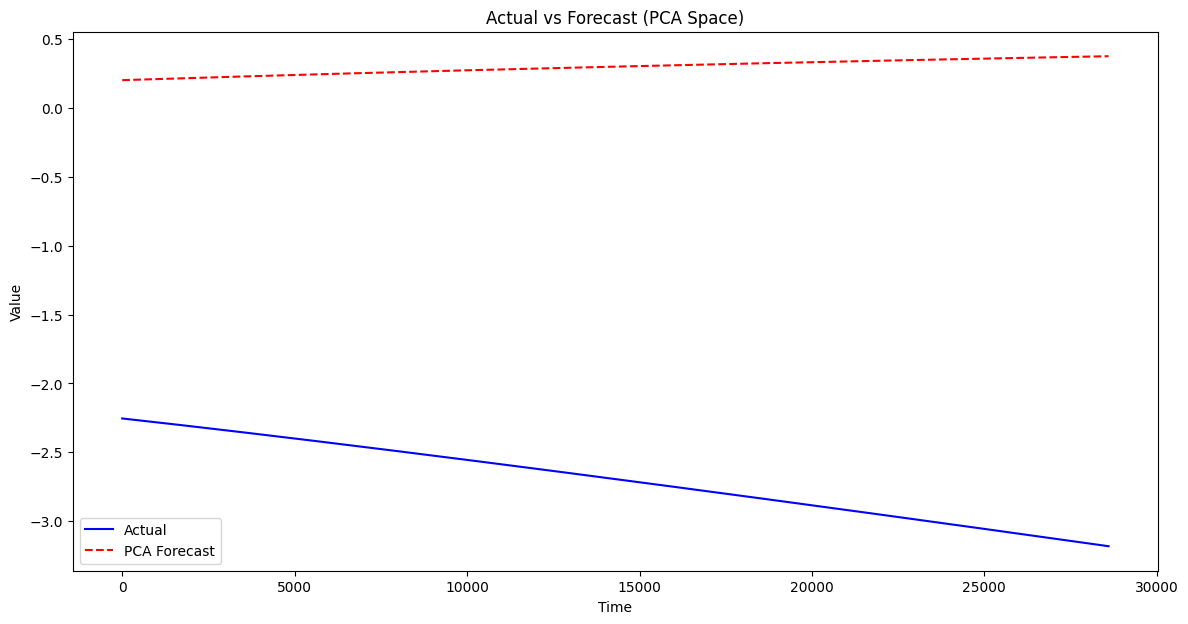

In [44]:
import matplotlib.pyplot as plt


# Generate forecasts on the test set in PCA space
pca_forecasts_test = model.predict(X_test_reshaped)

# Actual vs Forecast in PCA space for the first component
plt.figure(figsize=(14, 7))
plt.plot(y_test_split, label='Actual', color='blue')
plt.plot(pca_forecasts_test, label='PCA Forecast', color='red', linestyle='--')
plt.title('Actual vs Forecast (PCA Space)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()